In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt
import math
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from datetime import datetime, timedelta
from time import strptime
from sklearn import preprocessing
import least_squares as ls

In [2]:
majorLocator = MultipleLocator(1)

mpl.rcParams['figure.figsize']=(20,6)
np.set_printoptions(threshold=np.nan)


In [3]:
dataset = []
data, titles = ls.open_csv("bitcoin.csv", delimiter=',')
for line in data:
    td=timedelta(days=1)
    dt=datetime.strptime(line[0], "%b %d, %Y")
    dt=dt.toordinal()
    dataset.append([float(dt)-734500]+[float(line[4])])
print (dataset[:1])
print(len(dataset))

[[2041.0, 2875.34]]
1556


In [4]:
def featureSelect(begin,number,*feature):
    k=0
    if (number=="all"): number = len(dataset) - begin
    featureMatr = np.empty((number, len(feature)))
    for j in feature:
         for i in range(begin,begin+number):
            featureMatr[i][k] = dataset[i][j]
    k+=1     
    return featureMatr

In [5]:
def getVanderMatr(featureMatr,degree):
    vanderMatr = []
    for j in range (len(featureMatr)):
        arr=[]
        for i in range(degree+1):
            arr.append(pow(featureMatr[j][0],i))
        vanderMatr.append(arr)    
    vanderMatr = np.asarray(vanderMatr)
    return vanderMatr


In [6]:
def oneDimensionRegress(vanderMatr, responseMatr, lambdaR):
    matrAA = np.dot(vanderMatr.transpose(),vanderMatr) + lambdaR*np.eye(len(vanderMatr[0]))
    theta1 = np.linalg.inv(matrAA)
    theta2 = np.dot(vanderMatr.transpose(), responseMatr)
    theta = np.dot(theta1,theta2)
    return theta, np.linalg.det(matrAA), np.linalg.cond(matrAA)


In [7]:
def getResponseMatr(begin,number, column):
    if (number=="all"): number = len(dataset) - begin
    responseMatr = np.array([t_arr[column] for t_arr in dataset])
    responseMatr = responseMatr.reshape((len(responseMatr),1))
    result = responseMatr[begin:(begin+number)]
    return result


In [8]:
def slidingwindow(width, degree, lambdaR):
    predictArray = []
    errorsArray = []
    featureMatr = featureSelect(0,"all",0)
    responseMatr = getResponseMatr(0,"all",1)
    for begin in range(len(featureMatr) - width - 1):
        end = begin + width
        next = end + 1
        shortFeatureMatr = featureMatr[begin:end,:]
        vanderMatr = getVanderMatr(shortFeatureMatr,degree)
        shortResponseMatr = responseMatr[begin:end]
        [theta,det,cond] = oneDimensionRegress(vanderMatr, shortResponseMatr, lambdaR)
        
        predictFeatureMatr = featureMatr[next,:].reshape(1,1)
        predictVanderMatr = getVanderMatr(predictFeatureMatr,degree)
        predict = np.dot(predictVanderMatr,theta)
        predictArray.append(predict)
   
        errorsArray.append(responseMatr[next] - predict)
    errorsArray = (np.asarray(errorsArray)).reshape(len(errorsArray),1)
    predictArray = (np.asarray(predictArray)).reshape(len(predictArray),1)
    sse = np.dot(errorsArray.transpose(), errorsArray)
    mse = sse/(width - 2)
    plotDots(featureMatr,responseMatr, predictArray, width)
    return mse,math.fabs(det),cond


In [9]:
def plotDots(featureMatr, responseMatr, predicted, width):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(featureMatr[width+1:],responseMatr[width+1:],s=2)
    ax.scatter(featureMatr[width+1:], predicted, s=2) 
    print(featureMatr[width+1:].shape,(predicted).shape)

    plt.xlabel(r'$x$') 
    plt.grid(True) 
    plt.ylim(-500,4000)
    plt.show()
 

In [10]:
def plotData(arr, name):
    ax = plt.subplot()
    plt.plot([x for x in range (1, len(arr)+1)], arr, marker = ".", markersize = 8, markeredgewidth = 5)
    ax.xaxis.set_major_locator(majorLocator)
    plt.xlabel(r'$degree$')
    plt.ylabel(name)
    plt.grid(True) 
    plt.show()
 

In [11]:
def mseOnDegree(min,max,width, lambdaR):
    mseArray = []
    detArray = []
    condArray = []
    for degree in range(min,max + 1):
        [mse,det,cond] = slidingwindow(width,degree,lambdaR)
        mseArray.append(mse)
        detArray.append(det)
        condArray.append(cond)
    mseArray = np.asarray(mseArray).reshape(len(mseArray),)
    detArray = np.asarray(detArray).reshape(len(detArray),)
    condArray = np.asarray(condArray).reshape(len(condArray),)
    print("MSE",mseArray)
    print("determ",detArray)
    print("cond",condArray)
    plotData(mseArray, "MSE")
    plotData(detArray, "Determinant")
    plotData(condArray, "Condition Number")


(1455, 1) (1455, 1)


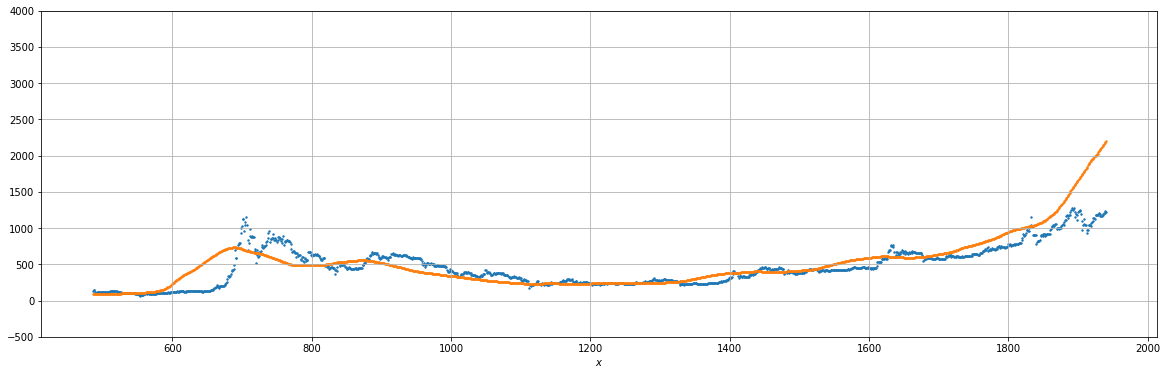

(1455, 1) (1455, 1)


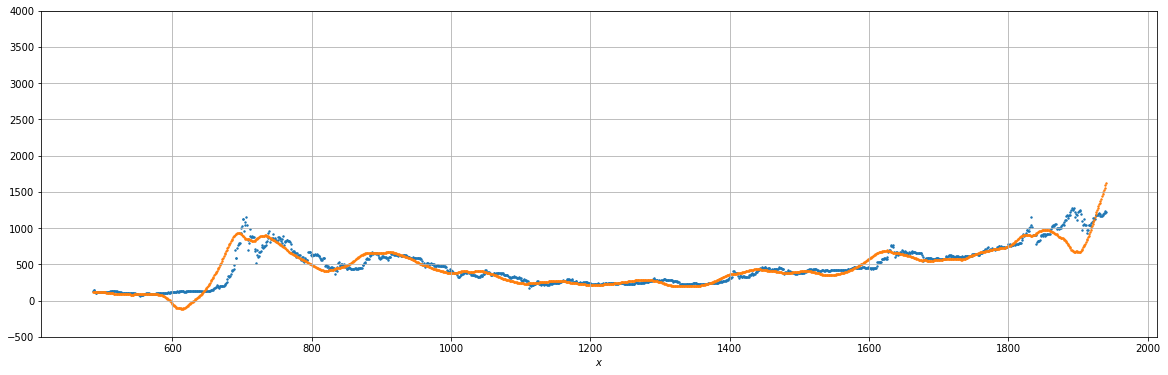

(1455, 1) (1455, 1)


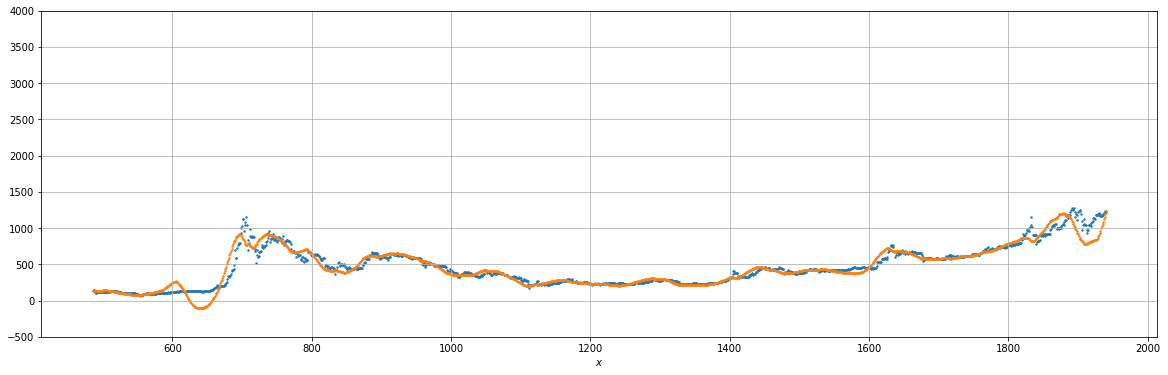

(1455, 1) (1455, 1)


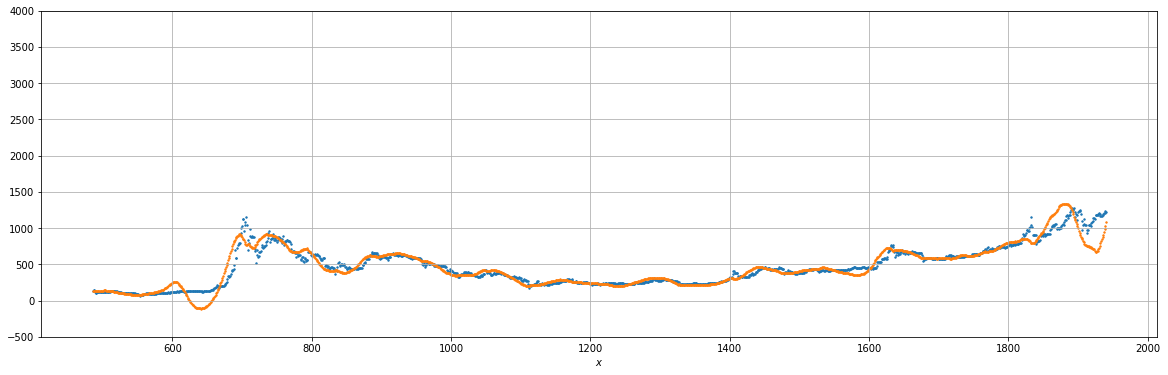

(1455, 1) (1455, 1)


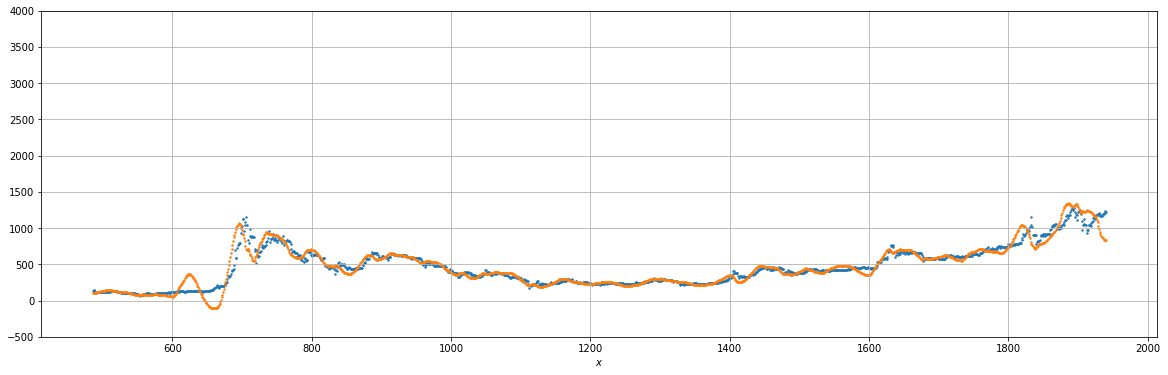

(1455, 1) (1455, 1)


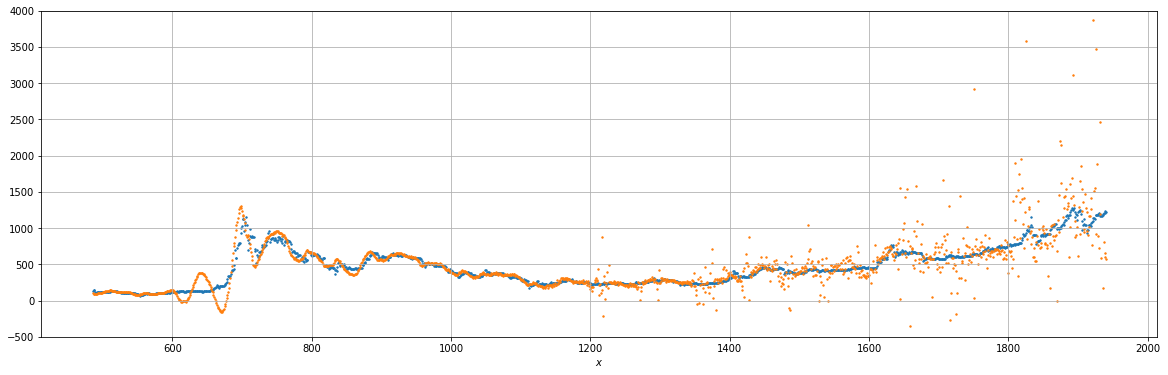

(1455, 1) (1455, 1)


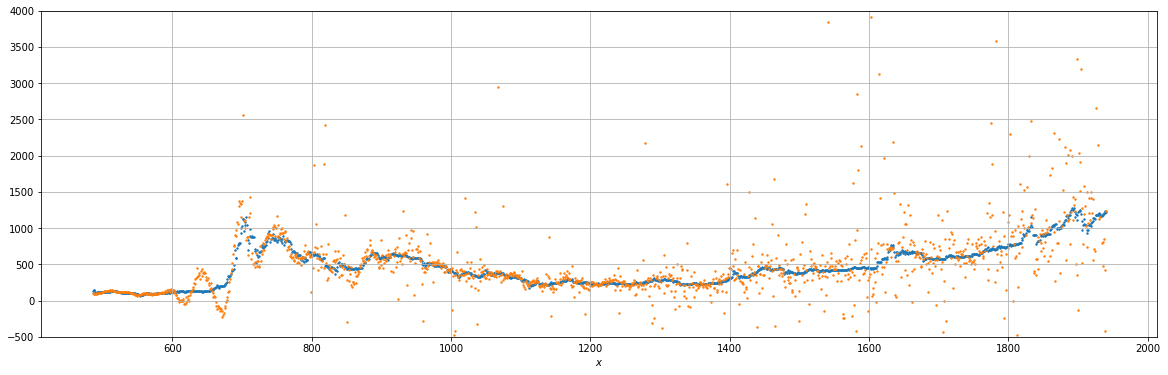

(1455, 1) (1455, 1)


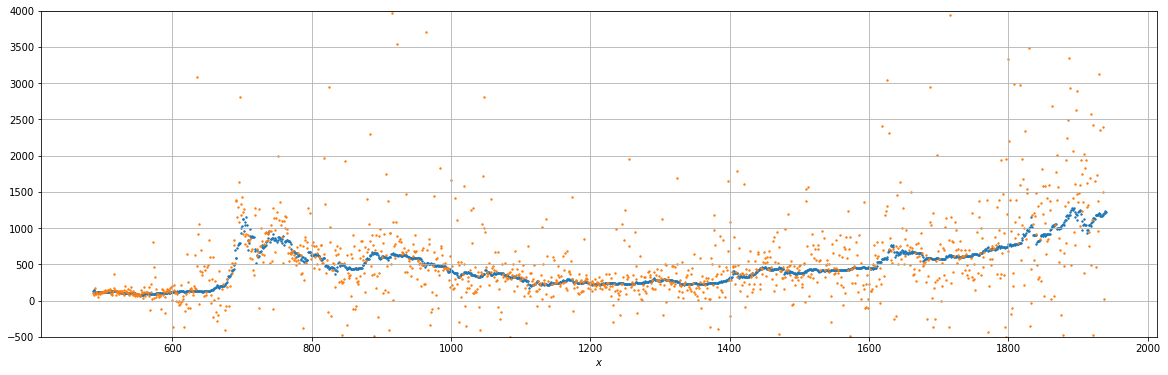

(1455, 1) (1455, 1)


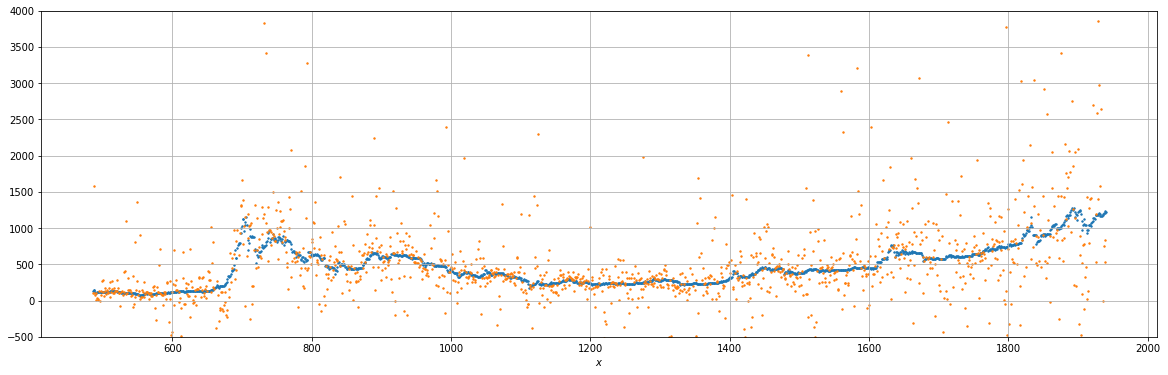

(1455, 1) (1455, 1)


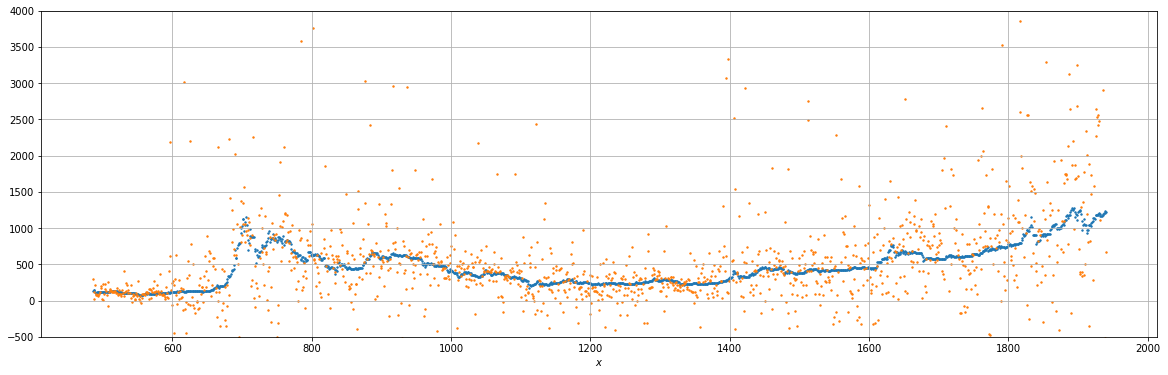

C:\Users\matam\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1804: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


(1455, 1) (1455, 1)


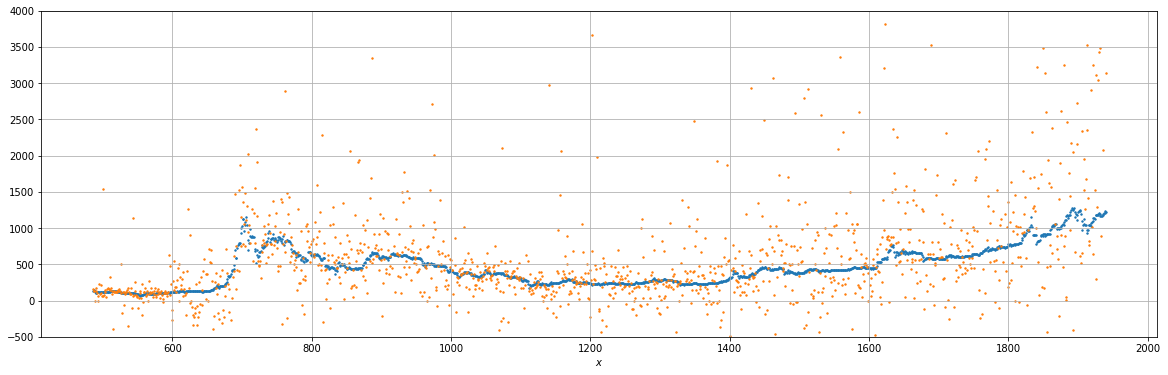

(1455, 1) (1455, 1)


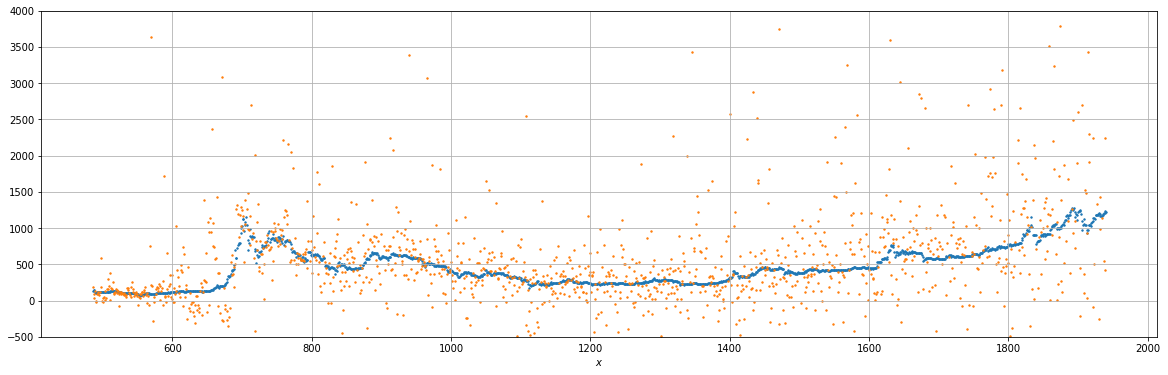

(1455, 1) (1455, 1)


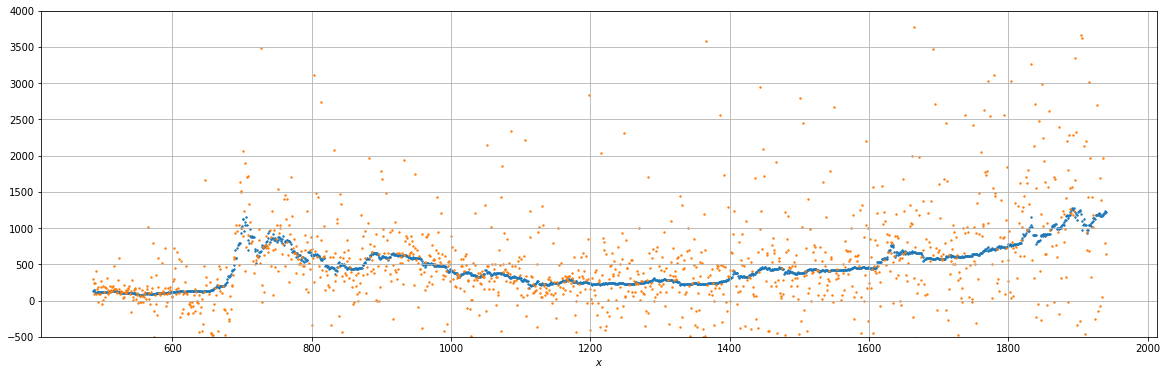

(1455, 1) (1455, 1)


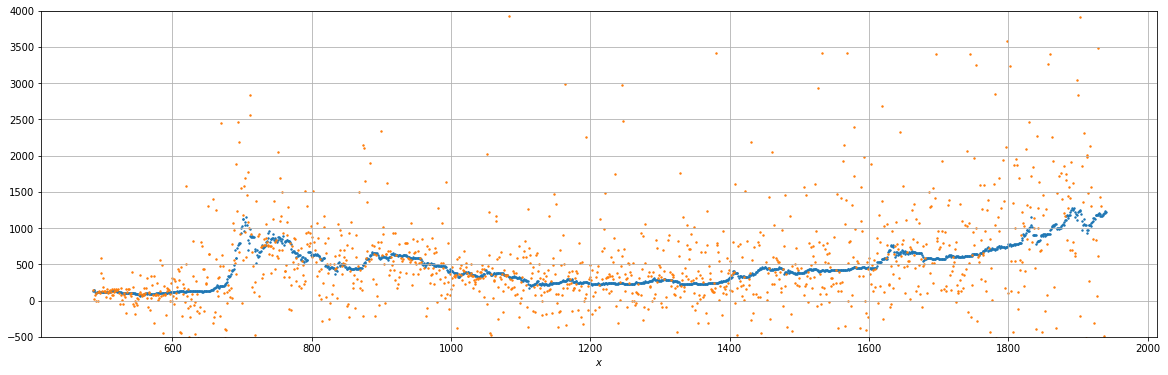

(1455, 1) (1455, 1)


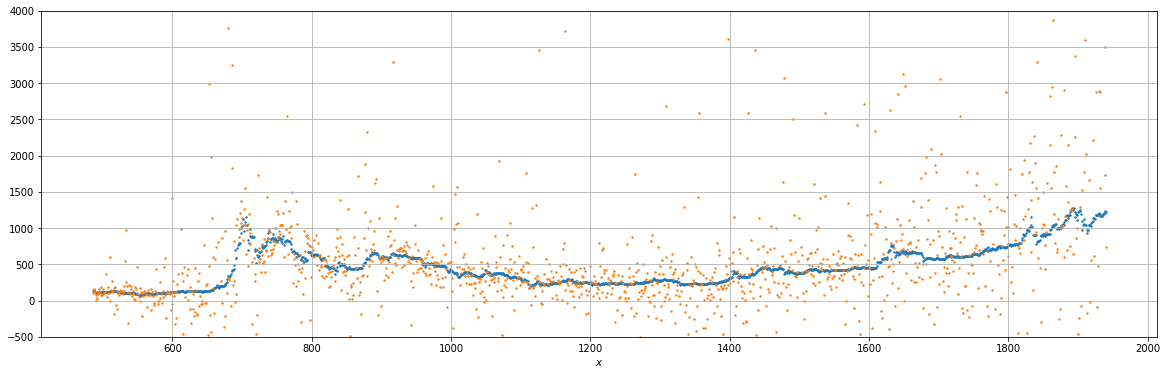

MSE [  5.82375535e+05   1.92901250e+05   1.08979540e+05   1.39298959e+05
   1.14413795e+05   1.19862107e+09   1.43485277e+08   8.18933881e+10
   5.10655805e+08   4.33420064e+08   1.38246978e+09   3.99263300e+08
   1.31635091e+10   7.83813049e+09   1.09741711e+08]
determ [  1.82176836e+008   4.15936707e+018   6.84954929e+031   1.02957037e+049
   2.83677346e+070   5.42835329e+094   8.94479697e+122   5.99095144e+155
   7.89706769e+193   2.09990129e+237   1.52263800e+286               inf
               inf               inf               inf]
cond [  4.60813747e+06   1.41505501e+12   4.19379364e+17   1.51285083e+23
   1.17640669e+32   1.90413329e+37   1.67786724e+41   4.33074276e+44
   1.54446095e+49   6.00630955e+52   1.64677084e+57   1.70342285e+59
   3.39251283e+65   1.74495521e+69   9.35947789e+72]


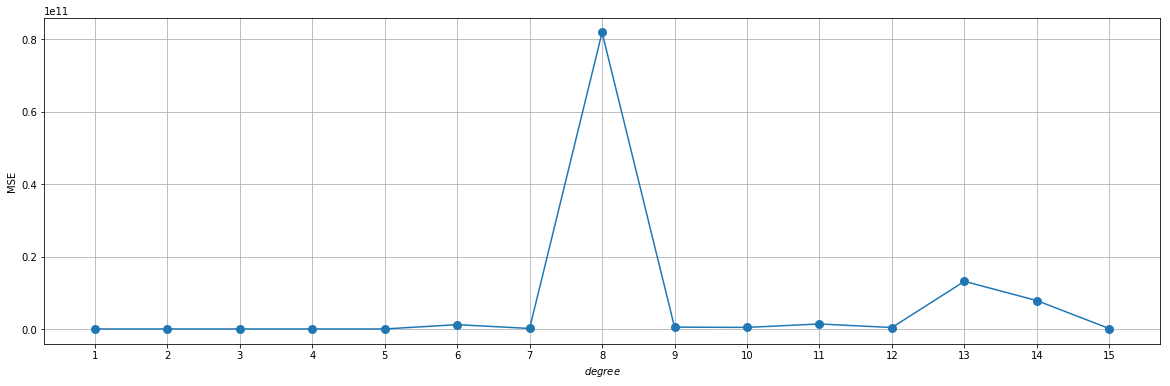

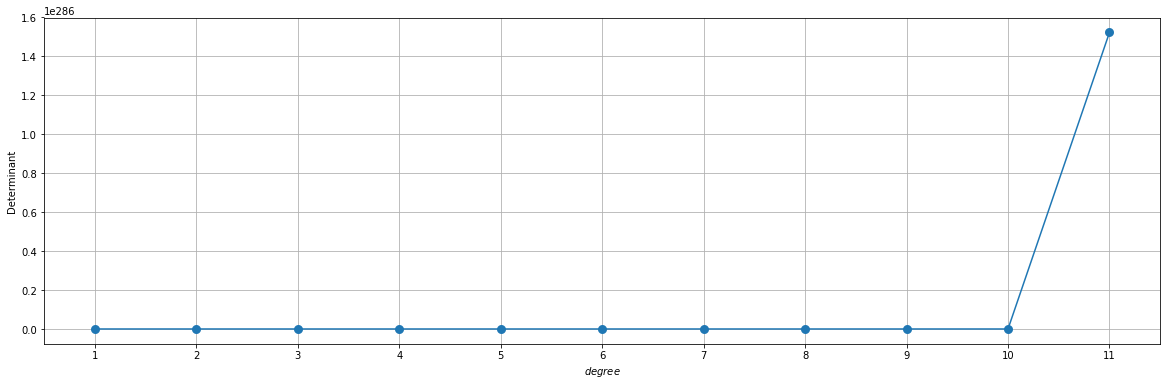

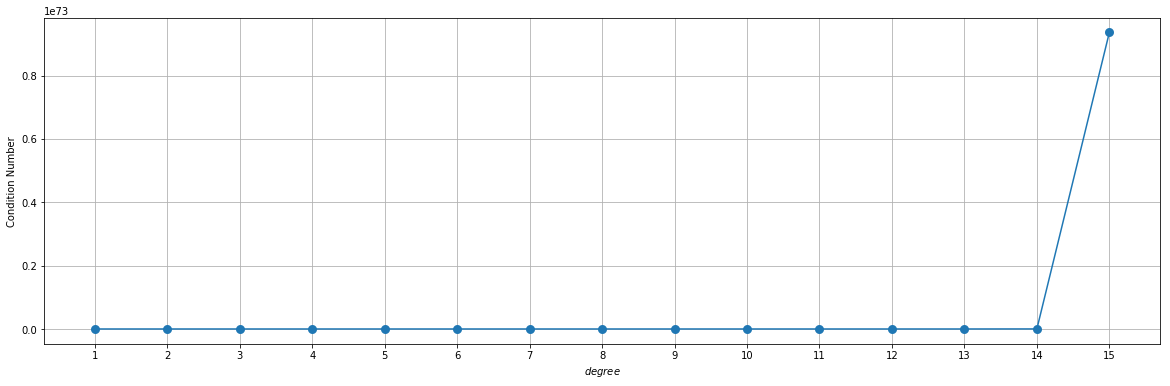

In [12]:
mseOnDegree(1,15,100,6)